In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import igraph
import glob

sns.set_context("talk", font_scale=1.4)
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [60]:
airport_ids_df = pd.read_csv('uk-air/uk-airports-icao-id.csv', sep=';')
airport_ids_df

,#Name,ICAO ID,City,Alternate Name
0,ABERPORTH,EGFA,NaN,WEST WALES
1,ALDERGROVE,EGAA,Belfast,BELFAST INTL
2,BARKSTON HEATH,EGYE,NaN,NaN
3,BENBECULA,EGPL,NaN,NaN
4,BENSON,EGUB,NaN,NaN
...,...,...,...,...
118,WITTERING,EGXT,NaN,NaN
119,WOLVERHAMPTON,EGBO,NaN,HALFPENNY GREEN
120,WOODVALE,EGOW,NaN,NaN
121,WYTON,EGUY,NaN,NaN


In [61]:
airport_coords_df = pd.read_csv('uk-air/uk-airports-coordinates-list.csv', sep=';')
airport_coords_df.rename(columns={'ICAO code': 'ICAO ID'}, inplace=True)
airport_coords_df

,# Name,City,ICAO ID,Latitude,Longitude
0,Belfast International Airport,Belfast,EGAA,54.657501,-6.215830
1,St Angelo Airport,Enniskillen,EGAB,54.398899,-7.651670
2,George Best Belfast City Airport,Belfast,EGAC,54.618099,-5.872500
3,City of Derry Airport,Londonderry,EGAE,55.042801,-7.161110
4,Birmingham International Airport,Birmingham,EGBB,52.453899,-1.748030
...,...,...,...,...,...
161,Thurrock Airfield,Thurrock,EGMT,51.537505,0.367634
162,Stapleford Aerodrome,Stapleford,EGSG,51.652500,0.155833
163,Chichester/Goodwood Airport,Goodwood,EGHR,50.859402,-0.759167
164,RAF Spadeadam,Spadeadam,EGOM,55.049999,-2.550000


In [62]:
airport_df = pd.merge(airport_ids_df, airport_coords_df, on=['ICAO ID'], how='inner')
airport_df.drop(columns=['City_x'], inplace=True)
airport_df.rename(columns={'#Name': 'Name', '# Name': 'Official Name', 'City_y': 'City'}, inplace=True)
airport_df

,Name,ICAO ID,Alternate Name,Official Name,City,Latitude,Longitude
0,ALDERGROVE,EGAA,BELFAST INTL,Belfast International Airport,Belfast,54.657501,-6.215830
1,BARKSTON HEATH,EGYE,NaN,RAF Barkston Heath,Barkston Heath,52.962200,-0.561625
2,BENBECULA,EGPL,NaN,Benbecula Airport,Benbecula,57.481098,-7.362780
3,BENSON,EGUB,NaN,RAF Benson,Benson,51.616402,-1.095830
4,BIGGIN HILL,EGKB,NaN,London Biggin Hill Airport,Biggin Hill,51.330799,0.032500
...,...,...,...,...,...,...,...
110,WITTERING,EGXT,NaN,RAF Wittering,Wittering,52.612598,-0.476453
111,WOLVERHAMPTON,EGBO,HALFPENNY GREEN,Wolverhampton Halfpenny Green Airport,Halfpenny Green,52.517502,-2.259440
112,WOODVALE,EGOW,NaN,RAF Woodvale,Woodvale,53.581600,-3.055520
113,WYTON,EGUY,NaN,RAF Wyton,Wyton,52.357201,-0.107833


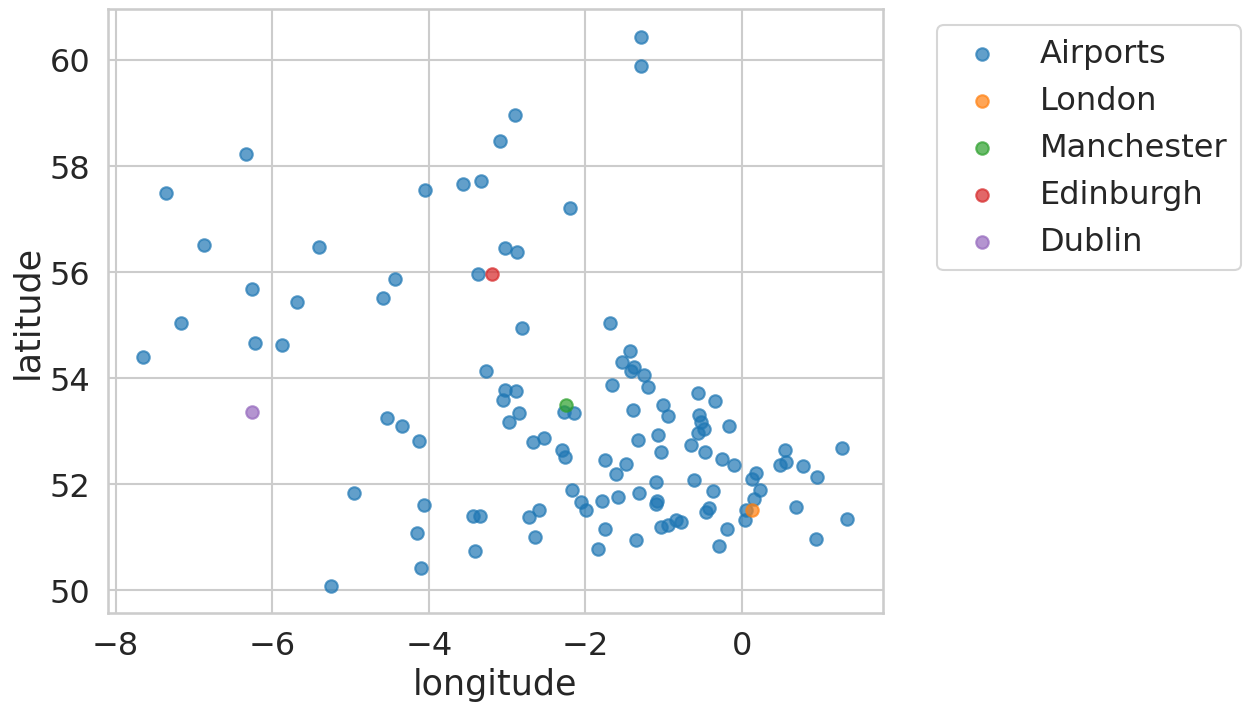

In [63]:
fig, ax = plt.subplots()
ax.scatter(airport_df['Longitude'], airport_df['Latitude'], alpha=0.7, label='Airports')
ax.scatter([0.1278], [51.5074], alpha=0.7, label='London')
ax.scatter([-2.2426], [53.4808], alpha=0.7, label='Manchester')
ax.scatter([-3.1883], [55.9533], alpha=0.7, label='Edinburgh')
ax.scatter([-6.2603], [53.3498], alpha=0.7, label='Dublin')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.show()

In [64]:
edge_lists = glob.glob('uk-air/Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_*')

edge_list_df1 = pd.read_csv(edge_lists[0], sep=';')
edge_list_df1.drop(columns=['Unnamed: 3'], inplace=True)

for i in range(1, len(edge_lists)):

    edge_list_df2 = pd.read_csv(edge_lists[i], sep=';')
    edge_list_df2.drop(columns=['Unnamed: 3'], inplace=True)

    combined = pd.merge(edge_list_df1, edge_list_df2, on=['#this_apt_name', 'that_apt_name'], how='outer')
    combined.fillna(0, inplace=True)
    combined['passengers'] = combined['passengers_x'] + combined['passengers_y']
    combined.drop(columns=['passengers_x', 'passengers_y'], inplace=True)
    edge_list_df1 = combined

edge_list = edge_list_df1.loc[(edge_list_df1['passengers'] != 0)]

edge_list

,#this_apt_name,that_apt_name,passengers
0,HEATHROW,ABERDEEN,6588785.0
1,HEATHROW,BELFAST CITY,1562958.0
2,HEATHROW,BELFAST INTERNATIONAL,13009308.0
3,HEATHROW,EDINBURGH,20193287.0
4,HEATHROW,GLASGOW,18498595.0
...,...,...,...
432,BOURNEMOUTH,HUMBERSIDE,28.0
433,COVENTRY,GLOUCESTERSHIRE,79.0
434,DURHAM TEES VALLEY,EXETER,7.0
435,DURHAM TEES VALLEY,MANCHESTER,17.0


In [65]:
# ICAO_dict = airport_df.set_index('Name')['ICAO ID'].to_dict()

In [66]:
# edge_list['#this_apt_name'] = edge_list['#this_apt_name'].apply(lambda x: ICAO_dict.get(x, pd.NA))
# edge_list['that_apt_name'] = edge_list['that_apt_name'].apply(lambda x: ICAO_dict.get(x, pd.NA))
# edge_list

In [67]:
edge_list = edge_list.dropna()

In [68]:
gd = igraph.Graph.TupleList(edge_list.values.tolist(), directed=True, edge_attrs=['weight'])

In [69]:
info_map_clustering = gd.community_infomap(edge_weights=gd.es['weight'], trials=20)

In [70]:
cluster_map = dict(zip(gd.vs['name'], info_map_clustering.membership))

In [71]:
cluster_map

{'HEATHROW': 0,
 'ABERDEEN': 0,
 'BELFAST CITY': 0,
 'BELFAST INTERNATIONAL': 0,
 'EDINBURGH': 0,
 'GLASGOW': 0,
 'ISLE OF MAN': 0,
 'LEEDS BRADFORD': 0,
 'MANCHESTER': 0,
 'NEWCASTLE': 0,
 'TEESSIDE': 0,
 'GATWICK': 0,
 'BRISTOL': 0,
 'EXETER': 0,
 'GUERNSEY': 0,
 'INVERNESS': 0,
 'JERSEY': 0,
 'NEWQUAY': 1,
 'PLYMOUTH': 1,
 'LONDON CITY': 0,
 'DUNDEE': 0,
 'LUTON': 0,
 'LIVERPOOL': 0,
 'SOUTHEND': 0,
 'STANSTED': 0,
 'LONDONDERRY': 0,
 'NORWICH': 0,
 'PRESTWICK': 0,
 'BIRMINGHAM': 0,
 'CARDIFF WALES': 0,
 'KIRKWALL': 0,
 'SOUTHAMPTON': 0,
 'SUMBURGH': 0,
 'ALDERNEY': 0,
 'BLACKPOOL': 0,
 'EAST MIDLANDS': 0,
 'SHEFFIELD CITY': 0,
 'BOURNEMOUTH': 0,
 'ISLES OF SCILLY (ST.MARYS)': 0,
 'COVENTRY': 0,
 'DUBLIN': 0,
 'ISLES OF SCILLY (TRESCO)': 0,
 'LANDS END (ST JUST)': 1,
 'PENZANCE HELIPORT': 0,
 'HUMBERSIDE': 0,
 'FILTON': 2,
 'HAWARDEN': 2,
 'DURHAM TEES VALLEY': 0,
 "NOTTINGHAM EAST MIDLANDS INT'L": 0,
 'BARROW-IN-FURNESS': 0,
 'CAMBRIDGE': 0,
 'CITY OF DERRY (EGLINTON)': 0,
 'GLOUCE

In [75]:
airport_df['clusters_infomap'] = -1

for key, val in cluster_map.items():
    
    airport_df.loc[(airport_df['Name'] == key),'clusters_infomap'] = val

airport_df_filtered = airport_df[airport_df['clusters_infomap'] != -1] 
airport_df_filtered

,Name,ICAO ID,Alternate Name,Official Name,City,Latitude,Longitude,clusters_infomap
4,BIGGIN HILL,EGKB,NaN,London Biggin Hill Airport,Biggin Hill,51.330799,0.032500,0
5,BIRMINGHAM,EGBB,NaN,Birmingham International Airport,Birmingham,52.453899,-1.748030,0
7,BLACKPOOL,EGNH,NaN,Blackpool International Airport,Blackpool,53.771702,-3.028610,0
9,BOURNEMOUTH,EGHH,NaN,Bournemouth Airport,Bournemouth,50.779999,-1.842500,0
10,BRISTOL,EGGD,NaN,Bristol Airport,Bristol,51.382702,-2.719090,0
15,CAMBRIDGE,EGSC,NaN,Cambridge Airport,Cambridge,52.205002,0.175000,0
22,LONDON CITY,EGLC,LONDON,London City Airport,London,51.505299,0.055278,0
23,BELFAST CITY,EGAC,BELFAST,George Best Belfast City Airport,Belfast,54.618099,-5.872500,0
28,COVENTRY,EGBE,NaN,Coventry Airport,Coventry,52.369701,-1.479720,0
34,DUNDEE,EGPN,NaN,Dundee Airport,Dundee,56.452499,-3.025830,0


In [84]:
len(airport_df_filtered)

34

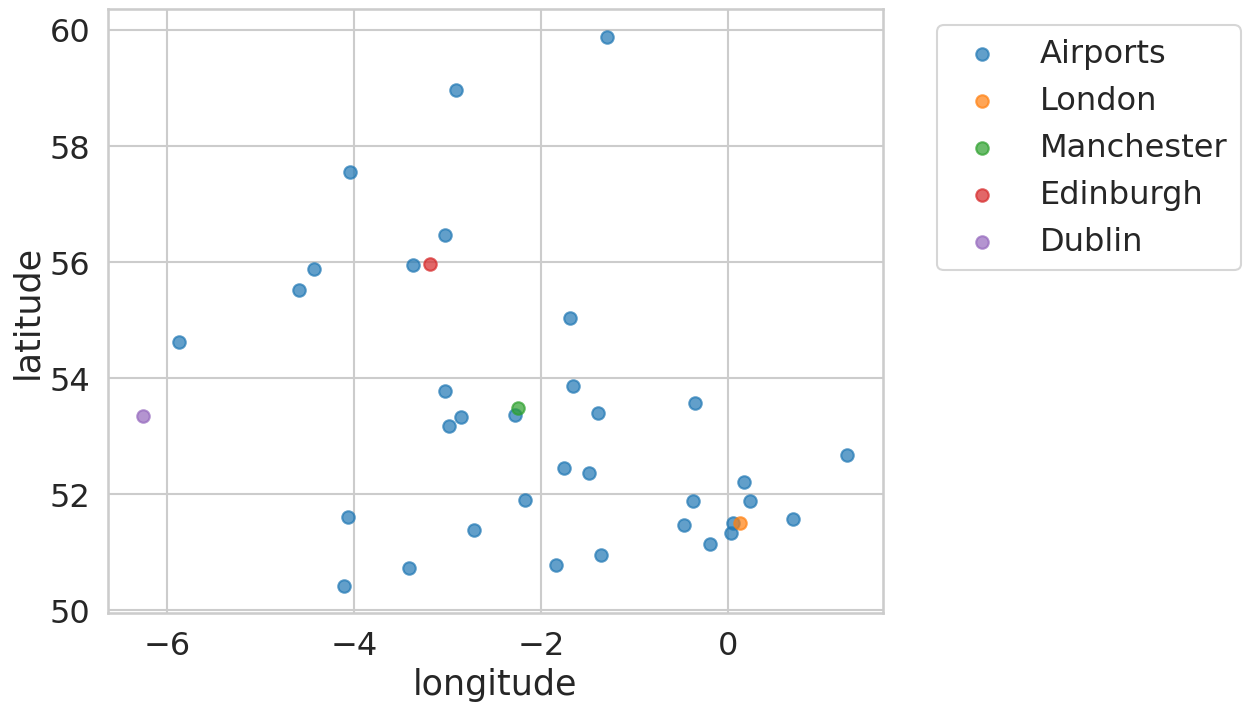

In [77]:
fig, ax = plt.subplots()
ax.scatter(airport_df_filtered['Longitude'], airport_df_filtered['Latitude'], alpha=0.7, label='Airports')
ax.scatter([0.1278], [51.5074], alpha=0.7, label='London')
ax.scatter([-2.2426], [53.4808], alpha=0.7, label='Manchester')
ax.scatter([-3.1883], [55.9533], alpha=0.7, label='Edinburgh')
ax.scatter([-6.2603], [53.3498], alpha=0.7, label='Dublin')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(airport_df_filtered['Longitude'], airport_df_filtered['Latitude'], alpha=0.7, label='Airports')
ax.scatter([0.1278], [51.5074], alpha=0.7, label='London')
ax.scatter([-2.2426], [53.4808], alpha=0.7, label='Manchester')
ax.scatter([-3.1883], [55.9533], alpha=0.7, label='Edinburgh')
ax.scatter([-6.2603], [53.3498], alpha=0.7, label='Dublin')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.show()

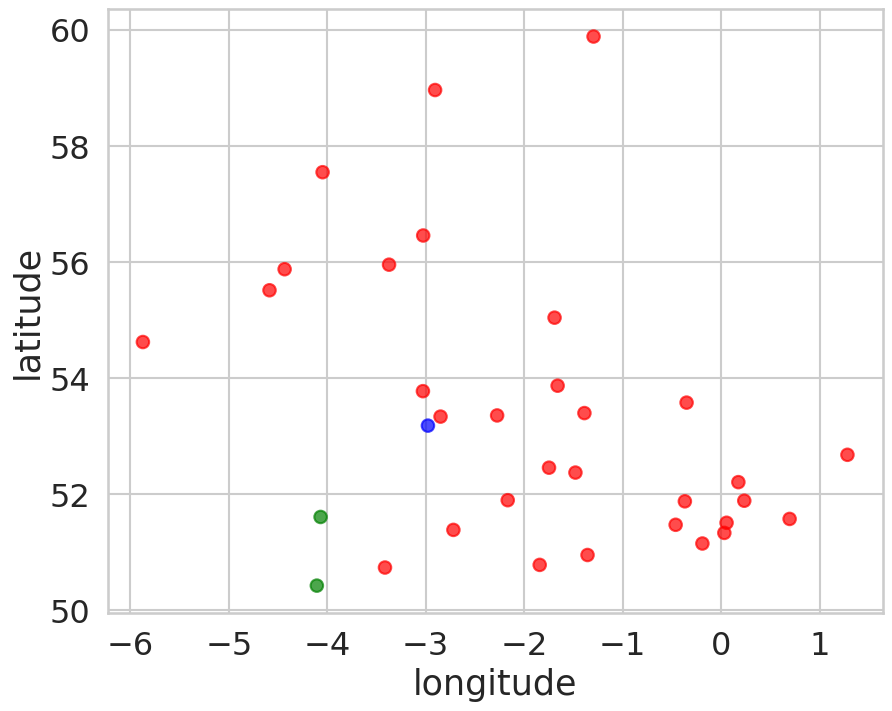

In [83]:
colormap = np.array(['red', 'green', 'blue', 'orange', 'pink'])
fig, ax = plt.subplots()
ax.scatter(airport_df_filtered['Longitude'], airport_df_filtered['Latitude'], alpha=0.7, 
           c=colormap[airport_df_filtered['clusters_infomap']])
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid(True)
plt.show()